## Домашнее задание по уроку 3

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Задача 1
Даны значения зарплат из выборки выпускников:

$$100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150$$

Без использования статистических функций вроде $mean$, $std$, $var$, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

#### Решение
Заполним массив

In [71]:
sal = pd.Series([
    100,80,75,77,89,33,45,25,65,17,30,24,57,55,70,75,65,84,90,150
])
sal

0     100
1      80
2      75
3      77
4      89
5      33
6      45
7      25
8      65
9      17
10     30
11     24
12     57
13     55
14     70
15     75
16     65
17     84
18     90
19    150
dtype: int64

Найдем среднее арифметическое и сравним с результатом выполнения статистической функции:

In [86]:
mean = sal.sum() / sal.count()
print(f"Результат: {mean}")
print(f"Используя mean: {sal.mean()}")

Результат: 65.3
Используя mean: 65.3


Среднее квадратичное отклонение:

In [89]:
std = np.sqrt(((sal - mean) ** 2).sum() / sal.count())
print(f"Результат: {std}")
print(f"Используя std: {sal.std(ddof=0)}")

Результат: 30.823854398825596
Используя std: 30.823854398825596


Смещенная и несмещенная оценка дисперсии:

In [66]:
var0 = ((sal - mean)**2).sum() / sal.count()  # смещенная
var1 = ((sal - mean)**2).sum() / (sal.count() - 1)  # несмещенная
print(f"Результат: {[var0,var1]}")
print(f"Используя var: {[sal.var(ddof=0), sal.var(ddof=1)]}")

Результат: [950.11, 1000.1157894736842]
Используя var: [950.11, 1000.1157894736842]


### Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из $boxplot$. В этой задаче можно использовать статистические функции.

#### Решение
Для начала, визуализируем данные, используя `boxplot`:

{'whiskers': [<matplotlib.lines.Line2D at 0x118fdd8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x118fddf60>,
 'boxes': [<matplotlib.lines.Line2D at 0x118fdd4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x118fcc630>],
 'fliers': [<matplotlib.lines.Line2D at 0x118fcc978>],
 'means': []}

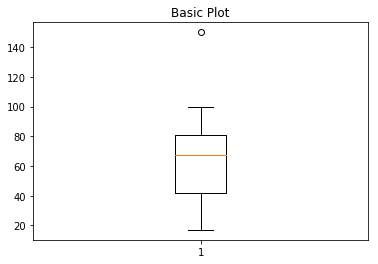

In [78]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(sal)

Подсчитаем первую и третью квантили:

In [67]:
q1 = sal.quantile(0.25)
q3 = sal.quantile(0.75)
q1,q3

(42.0, 81.0)

Вычислим интерквартильное расстояние:

In [79]:
iqr = q3 - q1
iqr

39.0

Найдем выбросы в выборке:

In [84]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
outliers = sal.loc[(sal < boxplot_range[0]) | (sal > boxplot_range[1])]
outliers

19    150
dtype: int64

Доля выбросов в выборке:

In [80]:
outliers.shape[0] / sal.shape[0]

0.05

### Задача 3

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

#### Решение
Пусть событие `A` заключается в том, что студент сдал первую сессию. 
Кроме того, пусть для каждого $i \in \{ A,B,C \}$ событие $B_i$ заключается в том, что сессию сдал студент с $i$-го факультета.
В такой формулировке наша задача - поочередно найти вероятность $P(B_A | A)$, $P(B_B | A)$, $P(B_C | A)$.
$$ P(B_A\:|\:A) = \frac{P(A\:|\:B_A) \cdot P(B_A)}{P(A)} $$
$$ P(B_B\:|\:A) = \frac{P(A\:|\:B_B) \cdot P(B_B)}{P(A)} $$
$$ P(B_C\:|\:A) = \frac{P(A\:|\:B_C) \cdot P(B_C)}{P(A)} $$

при том, что нам известна вероятность сдачи студентов каждого факультета:

$$ P(A\:|\:B_A) = 0.8 $$
$$ P(A\:|\:B_B) = 0.7 $$
$$ P(A\:|\:B_C) = 0.9 $$

Общая вероятность сдачи сессии:
$$P(A) = P(B_A) \cdot P(A | B_A) + P(B_B) \cdot P(A | B_B) + P(B_C) \cdot P(A | B_C) = $$
$$= \dfrac{1}{4} \cdot 0.8 + \dfrac{1}{4} \cdot 0.7 + \dfrac{1}{2} \cdot 0.9 = 0.825$$

Подставляя значение в каждое уравнение:
$$ P(B_A\:|\:A) = \frac{0.25 \cdot 0.8}{0.825} = 0.24 $$
$$ P(B_B\:|\:A) = \frac{0.25 \cdot 0.7}{0.825} = 0.21 $$
$$ P(B_C\:|\:A) = \frac{0.5 \cdot 0.9}{0.825} = 0.545 $$
